In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# localization

In [27]:
car_image = imread("./datasets/images/Cars0.png", as_gray=True)
# plt.imshow(car_image, cmap="gray")

car_image_gray = car_image * 255
# plt.imshow(car_image_gray, cmap="gray")
t = threshold_otsu(car_image_gray)

# Converting gray img to binary image
binary_car_image = car_image_gray > t
binary_car_image
# plt.imshow(binary_car_image, cmap="gray")

array([[False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Performing componene connected analysis (CAA)

In [28]:
from skimage import measure
import matplotlib.patches as patches

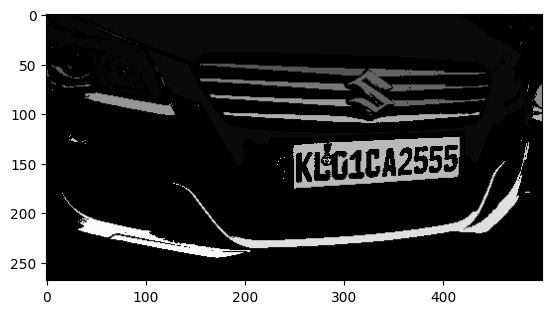

In [29]:
labled_img = measure.label(binary_car_image)
plt.imshow(labled_img, cmap="gray")

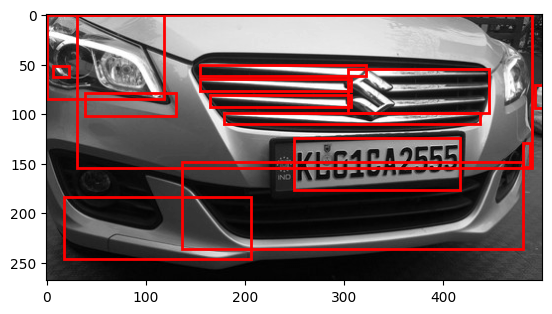

In [30]:
fig, (ax1) = plt.subplots(1)
ax1.imshow(car_image_gray, cmap="gray");
# print(len(measure.regionprops(labled_img)))
for region in measure.regionprops(labled_img):
    if region.area < 50: 
        continue

    # the bounding box coord
    minRow, minCol, maxRow, maxCol = region.bbox

    rect = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rect)
plt.show()
    

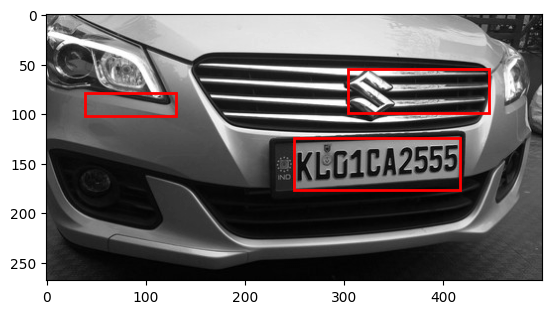

In [31]:
fig, (ax1) = plt.subplots(1)
ax1.imshow(car_image_gray, cmap="gray");
label_image = labled_img
plate_dimensions = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_h, max_h, min_w, max_w = plate_dimensions

for region in measure.regionprops(labled_img):

    if region.area < 50:
        continue

    min_row, min_col, max_row, max_col = region.bbox
    w = max_col - min_col
    h = max_row - min_row

    if not ( h <= max_h and h >= min_h and w <= max_w and w >= min_w ):
        continue

    rect = patches.Rectangle((min_col, min_row), max_col-min_col, max_row-min_row, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rect)

plt.show()

